Average Growth Rate: 0.0345
Maximum Growth Rate (Optimistic): 0.1146
Minimum Growth Rate (Pessimistic): -0.1501


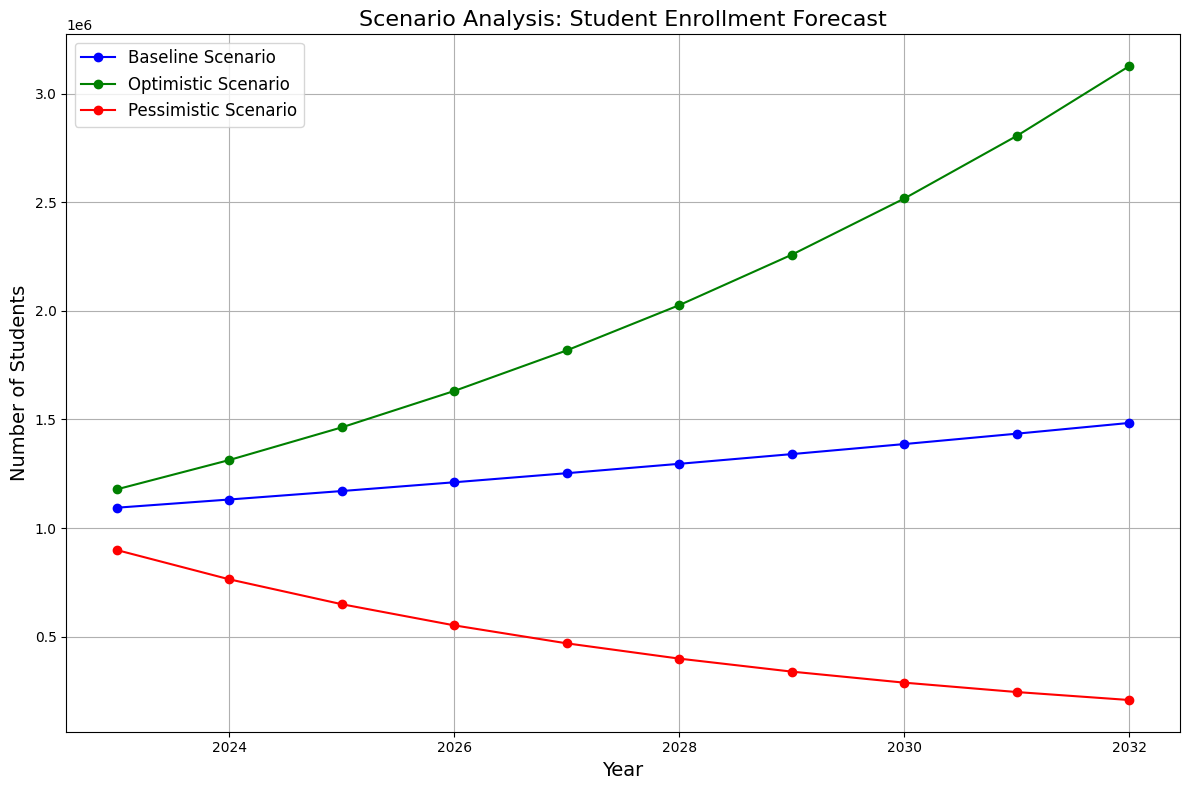

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"C:\Users\kavit\OneDrive\Desktop\status_1.xlsx"  # Replace with your file path
data = pd.read_excel(file_path, sheet_name='status')

# Step 2: Prepare the data
# Extract the starting year from the 'year' column and convert it to an integer
data['year'] = data['year'].str.split('/').str[0].astype(int)

# Step 3: Calculate historical growth rates
# Add a column to calculate the year-over-year growth rate for the 'students' column
data['growth_rate'] = data['students'].pct_change()

# Step 4: Calculate average, maximum, and minimum growth rates
# These will serve as the baseline, optimistic, and pessimistic growth rates
average_growth = data['growth_rate'].mean()
max_growth = data['growth_rate'].max()
min_growth = data['growth_rate'].min()

# Print growth rates for reference
print(f"Average Growth Rate: {average_growth:.4f}")
print(f"Maximum Growth Rate (Optimistic): {max_growth:.4f}")
print(f"Minimum Growth Rate (Pessimistic): {min_growth:.4f}")

# Step 5: Define the future years for forecasting
# Forecast for the next 10 years
future_years = list(range(data['year'].max() + 1, data['year'].max() + 11))

# Step 6: Perform scenario forecasts
# Start with the last known enrollment figure
current_enrollment = data['students'].iloc[-1]

# Forecast under each scenario
baseline_forecast = [current_enrollment * (1 + average_growth) ** (i + 1) for i in range(len(future_years))]
optimistic_forecast = [current_enrollment * (1 + max_growth) ** (i + 1) for i in range(len(future_years))]
pessimistic_forecast = [current_enrollment * (1 + min_growth) ** (i + 1) for i in range(len(future_years))]

# Step 7: Combine forecasts into a DataFrame
# This makes it easy to save and visualize
forecast_data = pd.DataFrame({
    'Year': future_years,
    'Baseline': baseline_forecast,
    'Optimistic': optimistic_forecast,
    'Pessimistic': pessimistic_forecast
})

# Step 8: Plot the scenarios
plt.figure(figsize=(12, 8))
plt.plot(forecast_data['Year'], forecast_data['Baseline'], label='Baseline Scenario', marker='o', color='blue')
plt.plot(forecast_data['Year'], forecast_data['Optimistic'], label='Optimistic Scenario', marker='o', color='green')
plt.plot(forecast_data['Year'], forecast_data['Pessimistic'], label='Pessimistic Scenario', marker='o', color='red')

# Add titles and labels for clarity
plt.title("Scenario Analysis: Student Enrollment Forecast", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



In [6]:

# Step 9: Save forecasted data to an Excel file
# Save the forecasted data to an Excel file for further use
output_file_path = r"C:\Users\kavit\OneDrive\Desktop\Sula\Capstone.xlsx"  # Replace with your desired save location
forecast_data.to_excel(output_file_path, index=False)
print(f"Forecast data saved to {output_file_path}")

Forecast data saved to C:\Users\kavit\OneDrive\Desktop\Sula\Capstone.xlsx
